# Импорт

In [1]:
import pandas as pd
import numpy as np
from __future__ import division, print_function

import seaborn as sns
%pylab inline

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

Populating the interactive namespace from numpy and matplotlib


## Загрузка & первоначальный анализ

In [2]:
fold = 'C:\Virtual\ibm\\'
views = pd.read_csv(fold+'Views_Task.csv')

print (views.shape)
views['TIMESTAMP'] = pd.to_datetime(views['TIMESTAMP'])
views[:5]

(1819019, 5)


,SESSION_ID,COOKIE_ID,TIMESTAMP,PRODUCT_ID,Brand
0,1414197054496332800,50191443904105191665452,2015-11-01 05:00:09,622422.0,4
1,1414197054496332800,50191443904105191665452,2015-11-01 05:00:09,622422.0,4
2,4428785500379779072,50081434576176045083243,2015-11-01 05:00:12,435909.0,3
3,6251036414958810112,30201446332336113765034,2015-11-01 05:00:12,481888.0,6
4,6251036414958810112,30201446332336113765034,2015-11-01 05:00:12,481888.0,6


In [3]:
views.describe()

,SESSION_ID,PRODUCT_ID,Brand
count,1.819019e+06,1.819019e+06,1.819019e+06
mean,4.621410e+18,5.699130e+05,1.752852e+00
std,2.659426e+18,7.450704e+04,2.237266e+00
min,6.019640e+13,1.067100e+05,0.000000e+00
25%,2.312155e+18,5.267460e+05,0.000000e+00
50%,4.634341e+18,5.905040e+05,1.000000e+00
75%,6.919891e+18,6.231660e+05,3.000000e+00
max,9.223362e+18,9.988810e+05,9.000000e+00


In [7]:
views.Brand.value_counts()

0    800369
1    307845
2    199762
3    134602
4    130466
5     89294
6     70837
7     29649
8     29358
9     26837
Name: Brand, dtype: int64

# Поиск дублей

In [9]:
#Ищем одинаковые строки по всем столбцам
linit=views.columns
views[views.duplicated(linit,keep=False)].sort_values(by=['SESSION_ID','Brand','PRODUCT_ID'])

,SESSION_ID,COOKIE_ID,TIMESTAMP,PRODUCT_ID,Brand
411168,60196403623351,80131446650608291018947,2015-11-04 22:25:27,568978.0,3
411169,60196403623351,80131446650608291018947,2015-11-04 22:25:27,568978.0,3
295309,133110576436879,80151446480108133177203,2015-11-04 00:08:01,521262.0,2
295311,133110576436879,80151446480108133177203,2015-11-04 00:08:01,521262.0,2
295364,133110576436879,80151446480108133177203,2015-11-04 00:08:41,521262.0,2
295366,133110576436879,80151446480108133177203,2015-11-04 00:08:41,521262.0,2
434865,138032368739021,50081407165312005380763,2015-11-05 01:28:48,508135.0,2
434866,138032368739021,50081407165312005380763,2015-11-05 01:28:48,508135.0,2
37475,144433991675397,70071421089203039626033,2015-11-01 18:13:15,599140.0,0
37477,144433991675397,70071421089203039626033,2015-11-01 18:13:15,599140.0,0


In [11]:
# Общее число строк-дубликотов
print (np.shape(views[views.duplicated()])[0])

465673


#### Если достоверно известно, что наличие дубликата не несет дополнительной информации, то нижеследующий признак можно не добавлять:

In [12]:
print (np.shape(views))
views = views.groupby(list(views.columns)).size().reset_index().rename(columns={0:'REC_COUNT'})
views.head(7)

(1819019, 5)


,SESSION_ID,COOKIE_ID,TIMESTAMP,PRODUCT_ID,Brand,REC_COUNT
0,60196403623351,80131446650608291018947,2015-11-04 22:25:27,568978.0,3,2
1,81220141477229,80021447936631301852190,2015-11-19 19:38:49,645649.0,0,1
2,81220141477229,80021447936631301852190,2015-11-19 19:41:12,645647.0,0,1
3,81220141477229,80021447936631301852190,2015-11-19 19:41:57,626653.0,0,1
4,81220141477229,80021447936631301852190,2015-11-19 19:43:12,586175.0,0,1
5,81220141477229,80021447936631301852190,2015-11-19 19:45:17,645649.0,0,1
6,81220141477229,80021447936631301852190,2015-11-19 19:54:45,645649.0,0,1


In [13]:
# видно, что возможно различное число дубликатов,скорее всего это мусор
views.REC_COUNT.value_counts()

1    888004
2    465181
4       147
3         7
6         6
8         1
Name: REC_COUNT, dtype: int64

In [17]:
#удаляем дубли
views = views.drop_duplicates(linit)
views = views.drop('REC_COUNT',1) # удалим информацию о дубликатах для отличи от первой задачи
print (np.shape(views))

(1353346, 5)


## Распределение просмотров по брендам

In [23]:
views.Brand.value_counts()

0    630442
1    218949
2    137584
4    100004
3     96348
5     63917
6     48394
8     20039
7     18912
9     18757
Name: Brand, dtype: int64

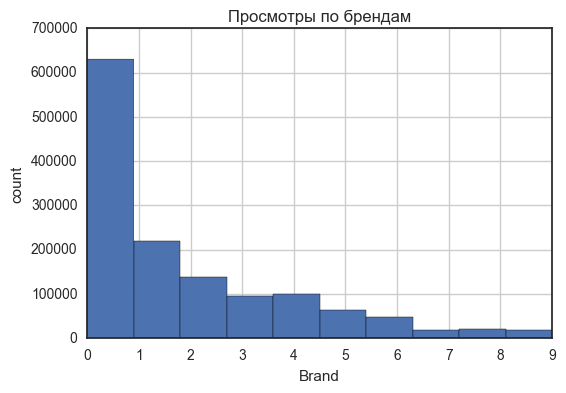

In [25]:
p = views.Brand.hist(bins=10)
p.set_xlabel('Brand')
p.set_ylabel('count')
p.set_xlim([0, 9])
p.set_title(u'Просмотры по брендам')

## Добавляем признаков по TIMESTAMP

In [19]:
print (max(views.TIMESTAMP))
print (min(views.TIMESTAMP))

2015-11-30 23:59:59
2015-11-01 05:00:09


In [20]:
views['day'] = views['TIMESTAMP'].dt.day
views['dayofweek'] = views['TIMESTAMP'].dt.dayofweek
views['hour'] = views['TIMESTAMP'].dt.hour
views[:5]

,SESSION_ID,COOKIE_ID,TIMESTAMP,PRODUCT_ID,Brand,day,dayofweek,hour,minute,second
0,60196403623351,80131446650608291018947,2015-11-04 22:25:27,568978.0,3,4,2,22,25,27
1,81220141477229,80021447936631301852190,2015-11-19 19:38:49,645649.0,0,19,3,19,38,49
2,81220141477229,80021447936631301852190,2015-11-19 19:41:12,645647.0,0,19,3,19,41,12
3,81220141477229,80021447936631301852190,2015-11-19 19:41:57,626653.0,0,19,3,19,41,57
4,81220141477229,80021447936631301852190,2015-11-19 19:43:12,586175.0,0,19,3,19,43,12


## Распределение просмотров по времени

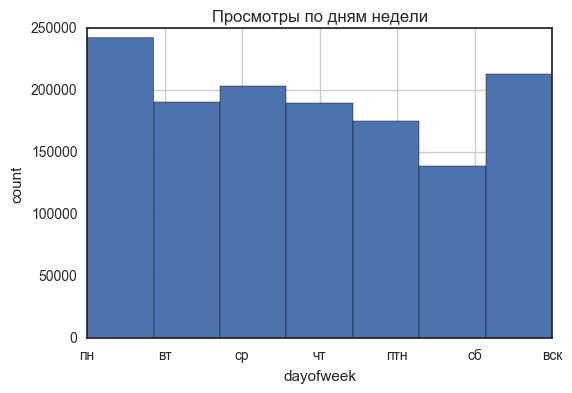

In [35]:
p = views.dayofweek.hist(bins=7)
p.set_xlabel('dayofweek')
p.set_ylabel('count')
p.set_xlim([0, 6])
labelizer=[u'пн', u'вт', u'ср', u'чт', u'птн', u'сб', u'вск']
p.set_xticklabels(labelizer)
p.set_title(u'Просмотры по дням недели')

## Бренды по дням недели:

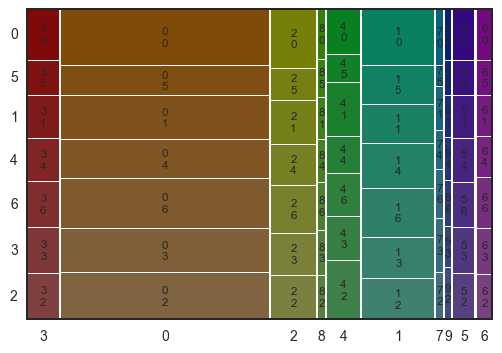

In [40]:
from statsmodels.graphics.mosaicplot import mosaic
#plt.rcParams['font.size'] = 16.0
mosaic(views, ['Brand', 'dayofweek']);

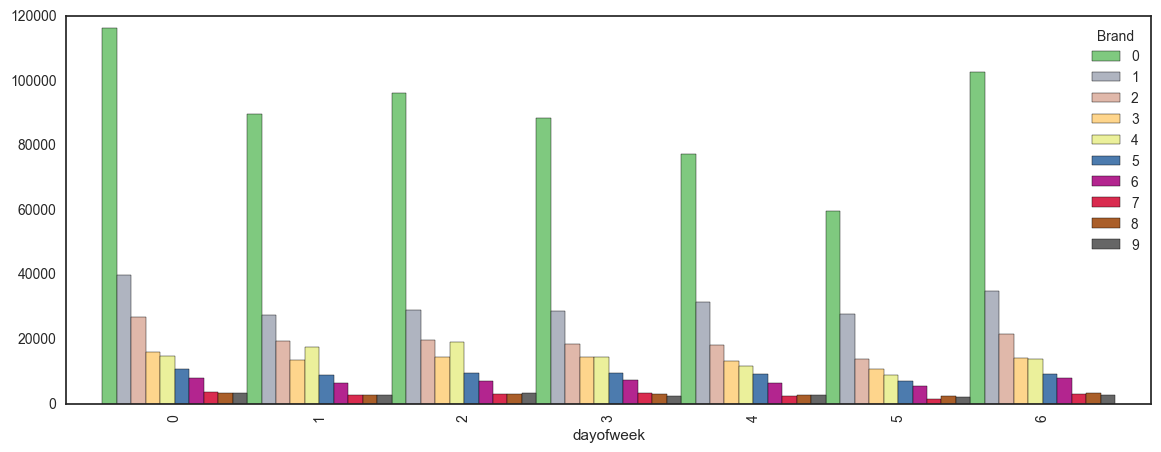

In [54]:
figsize(14, 5) 
ag = views[['dayofweek', 'Brand','SESSION_ID']].groupby(['dayofweek', 'Brand']).count().unstack()
ag.columns = ag.columns.droplevel()
ag.plot(kind = 'bar', colormap = cm.Accent, width = 1)
plt.show()

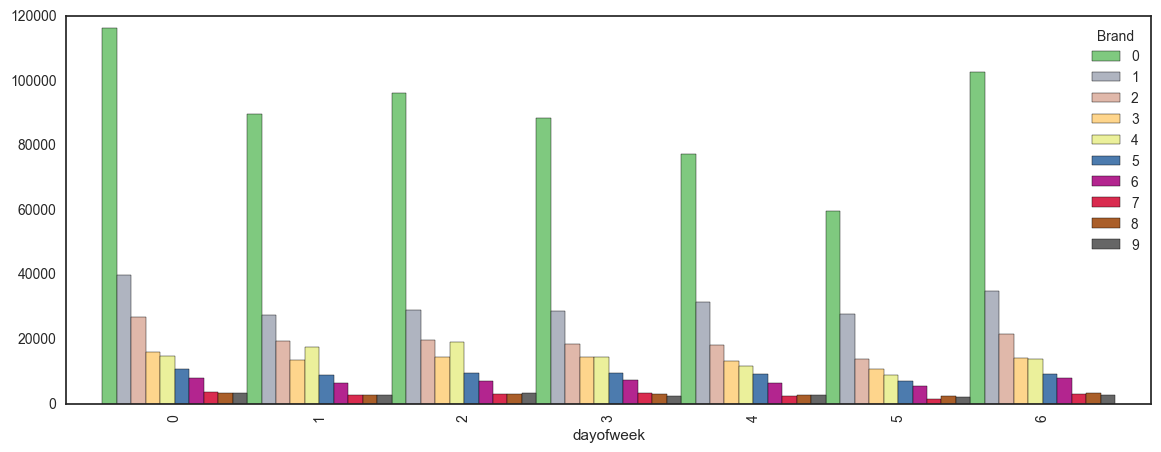

In [55]:
figsize(14, 5) 
ag = views[['dayofweek', 'Brand','COOKIE_ID']].groupby(['dayofweek', 'Brand']).count().unstack()
ag.columns = ag.columns.droplevel()
ag.plot(kind = 'bar', colormap = cm.Accent, width = 1)
plt.show()

## Бренды по часам

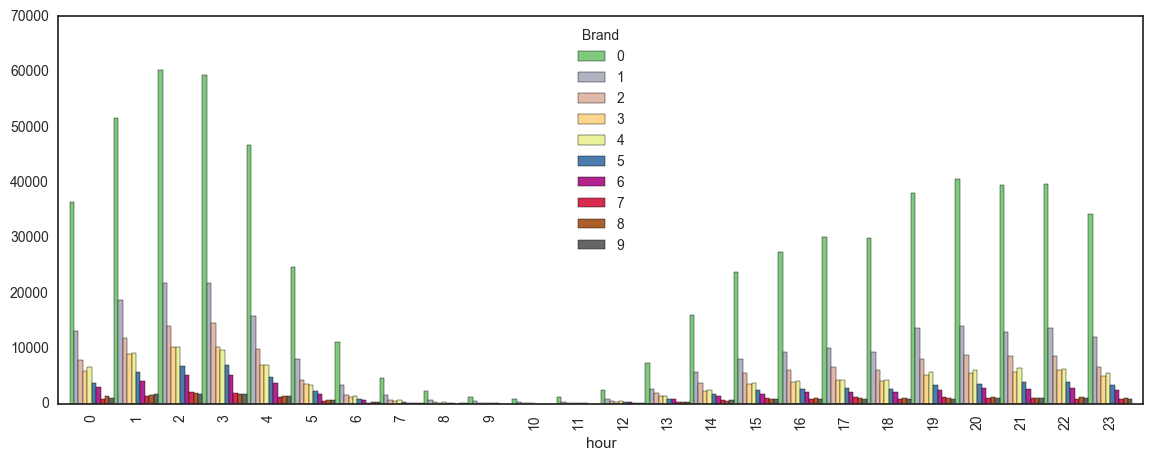

In [56]:
figsize(14, 5) 
ag = views[['hour', 'Brand','COOKIE_ID']].groupby(['hour', 'Brand']).count().unstack()
ag.columns = ag.columns.droplevel()
ag.plot(kind = 'bar', colormap = cm.Accent, width = 1)
plt.show()

In [57]:
# число дней
views.day.nunique()

30

(0, 30)

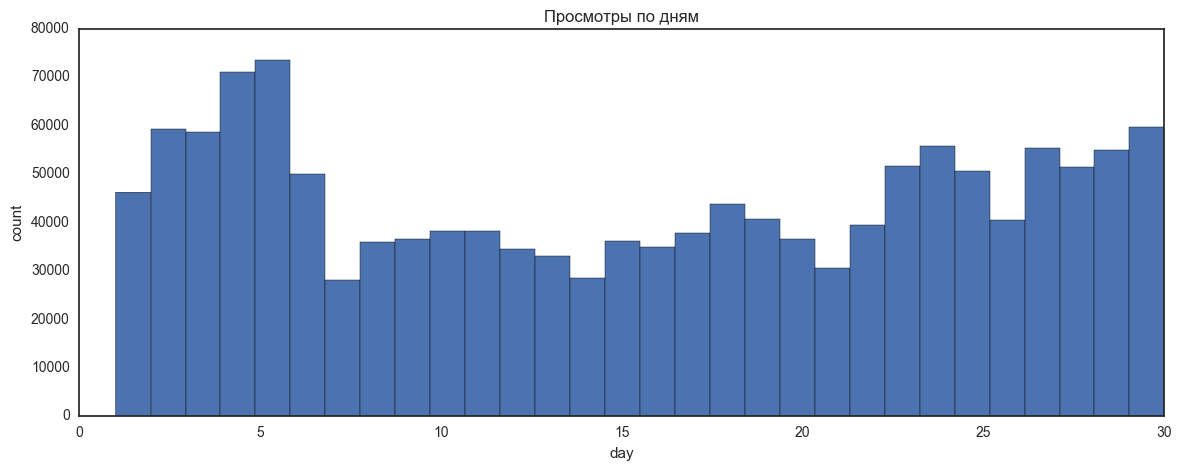

In [58]:
plt.hist(views.day.values, bins=30)
plt.xlabel('day')
plt.ylabel('count')
plt.title(u'Просмотры по дням')
plt.xlim([0, 30])

## Другие графики

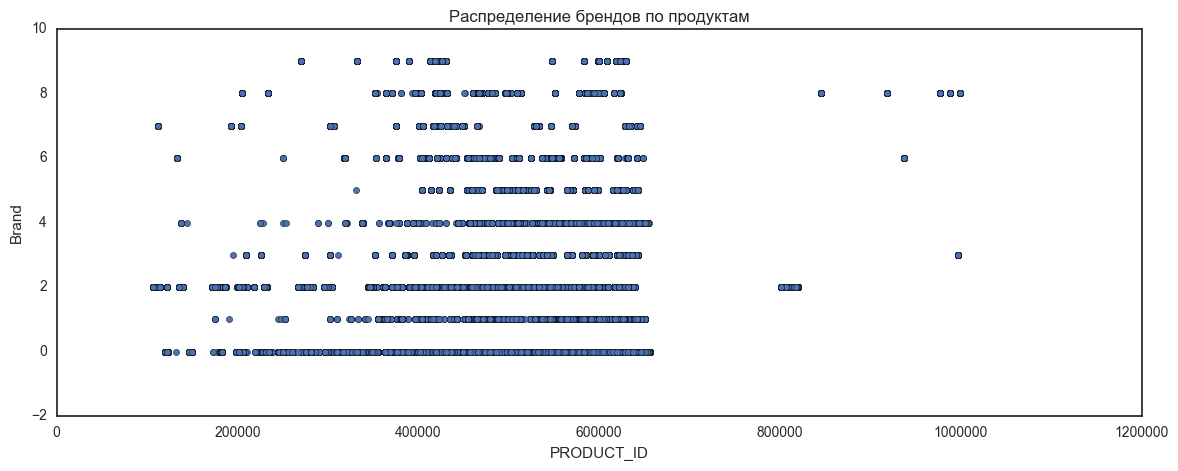

In [59]:
figsize(14, 5) 
views[['PRODUCT_ID', 'Brand']].plot(kind='scatter', x='PRODUCT_ID', y='Brand', title=u'Распределение брендов по продуктам')

In [60]:
views.head(2)

,SESSION_ID,COOKIE_ID,TIMESTAMP,PRODUCT_ID,Brand,day,dayofweek,hour,minute,second
0,60196403623351,80131446650608291018947,2015-11-04 22:25:27,568978.0,3,4,2,22,25,27
1,81220141477229,80021447936631301852190,2015-11-19 19:38:49,645649.0,0,19,3,19,38,49


In [61]:
print (views.SESSION_ID.nunique())
print (views.COOKIE_ID.nunique())
print (views.PRODUCT_ID.nunique())

338119
279144
16091


## Группировка по сессиям

In [62]:
#число записей по сессии
views['SESSION_ID_COUNT'] = views.groupby(['SESSION_ID'])['SESSION_ID'].transform('count')
#число кук по сессиям
#views['UNIQUE_COOKIE'] = views.groupby(['SESSION_ID'])['COOKIE_ID'].transform(lambda x: x.nunique()).astype(int64)


In [63]:
#time diff в секундах 
views['TdiffTotal'] = (views.groupby(['SESSION_ID'])['TIMESTAMP'].transform(max) - \
                     views.groupby(['SESSION_ID'])['TIMESTAMP'].transform(min)).astype('timedelta64[s]')
views['temp'] = views.groupby('SESSION_ID')['TIMESTAMP'].diff()
views['TdiffMax'] = views.groupby('SESSION_ID')['temp'].transform(max).astype('timedelta64[s]')
views['TdiffMin'] = views.groupby('SESSION_ID')['temp'].transform(min).astype('timedelta64[s]')


In [64]:
#число уникальных time
 #views['TUnique'] = views.groupby('SESSION_ID')['temp'].transform(min).astype('timedelta64[s]')   
#число уникальных PRODUCT_ID
views['PUnique'] = views.groupby(['SESSION_ID'])['PRODUCT_ID'].transform(lambda x: x.nunique())
#число уникальных Brand
views['BUnique'] = views.groupby(['SESSION_ID'])['Brand'].transform(lambda x: x.nunique())

In [65]:
#Brand / time diff
views['Brand_by_time_diff'] = views['BUnique'] / views['TdiffTotal'] 


In [66]:
#число записей / time diff
views['SESSION_ID_COUNT_by_time_diff'] = views['SESSION_ID_COUNT'] / views['TdiffTotal'] 
#число кук / time diff
#views['UNIQUE_COOKIE_by_time_diff'] = views['UNIQUE_COOKIE'] / views['TdiffTotal'] 

del views['temp']

In [67]:
views[(views.SESSION_ID == 6526585647633777664) | (views.COOKIE_ID=='80161445253327296350684')]

,SESSION_ID,COOKIE_ID,TIMESTAMP,PRODUCT_ID,Brand,day,dayofweek,hour,minute,second,SESSION_ID_COUNT,TdiffTotal,TdiffMax,TdiffMin,PUnique,BUnique,Brand_by_time_diff,SESSION_ID_COUNT_by_time_diff
384272,2620617520915026944,80161445253327296350684,2015-11-02 22:20:24,628239.0,0,2,0,22,20,24,10,3046.0,1417.0,48.0,9.0,3,0.000985,0.003283
384273,2620617520915026944,80161445253327296350684,2015-11-02 22:21:17,622009.0,0,2,0,22,21,17,10,3046.0,1417.0,48.0,9.0,3,0.000985,0.003283
384274,2620617520915026944,80161445253327296350684,2015-11-02 22:23:50,626685.0,0,2,0,22,23,50,10,3046.0,1417.0,48.0,9.0,3,0.000985,0.003283
384275,2620617520915026944,80161445253327296350684,2015-11-02 22:24:38,626685.0,0,2,0,22,24,38,10,3046.0,1417.0,48.0,9.0,3,0.000985,0.003283
384276,2620617520915026944,80161445253327296350684,2015-11-02 22:25:48,510486.0,5,2,0,22,25,48,10,3046.0,1417.0,48.0,9.0,3,0.000985,0.003283
384277,2620617520915026944,80161445253327296350684,2015-11-02 22:27:36,590552.0,1,2,0,22,27,36,10,3046.0,1417.0,48.0,9.0,3,0.000985,0.003283
384278,2620617520915026944,80161445253327296350684,2015-11-02 22:30:00,527409.0,0,2,0,22,30,0,10,3046.0,1417.0,48.0,9.0,3,0.000985,0.003283
384279,2620617520915026944,80161445253327296350684,2015-11-02 22:39:29,615597.0,0,2,0,22,39,29,10,3046.0,1417.0,48.0,9.0,3,0.000985,0.003283
384280,2620617520915026944,80161445253327296350684,2015-11-02 22:47:33,644506.0,0,2,0,22,47,33,10,3046.0,1417.0,48.0,9.0,3,0.000985,0.003283
384281,2620617520915026944,80161445253327296350684,2015-11-02 23:11:10,503765.0,0,2,0,23,11,10,10,3046.0,1417.0,48.0,9.0,3,0.000985,0.003283


In [69]:
views[(views.SESSION_ID == 5351922903166403584)]

,SESSION_ID,COOKIE_ID,TIMESTAMP,PRODUCT_ID,Brand,day,dayofweek,hour,minute,second,SESSION_ID_COUNT,TdiffTotal,TdiffMax,TdiffMin,PUnique,BUnique,Brand_by_time_diff,SESSION_ID_COUNT_by_time_diff
784156,5351922903166403584,80071446336930327086739,2015-11-01 07:03:53,548991.0,0,1,6,7,3,53,92,23651.0,3527.0,5.0,77.0,7,0.000296,0.00389
784157,5351922903166403584,80071446336930327086739,2015-11-01 07:04:13,554931.0,0,1,6,7,4,13,92,23651.0,3527.0,5.0,77.0,7,0.000296,0.00389
784158,5351922903166403584,80071446336930327086739,2015-11-01 07:04:32,574798.0,0,1,6,7,4,32,92,23651.0,3527.0,5.0,77.0,7,0.000296,0.00389
784159,5351922903166403584,80071446336930327086739,2015-11-01 07:05:01,549440.0,0,1,6,7,5,1,92,23651.0,3527.0,5.0,77.0,7,0.000296,0.00389
784160,5351922903166403584,80071446336930327086739,2015-11-01 07:05:11,593811.0,0,1,6,7,5,11,92,23651.0,3527.0,5.0,77.0,7,0.000296,0.00389
784161,5351922903166403584,80071446336930327086739,2015-11-01 07:09:01,548493.0,0,1,6,7,9,1,92,23651.0,3527.0,5.0,77.0,7,0.000296,0.00389
784162,5351922903166403584,80071446336930327086739,2015-11-01 07:11:03,524907.0,6,1,6,7,11,3,92,23651.0,3527.0,5.0,77.0,7,0.000296,0.00389
784163,5351922903166403584,80071446336930327086739,2015-11-01 07:15:17,543395.0,0,1,6,7,15,17,92,23651.0,3527.0,5.0,77.0,7,0.000296,0.00389
784164,5351922903166403584,80071446336930327086739,2015-11-01 07:15:30,498661.0,0,1,6,7,15,30,92,23651.0,3527.0,5.0,77.0,7,0.000296,0.00389
784165,5351922903166403584,80071446336930327086739,2015-11-01 07:15:44,511253.0,0,1,6,7,15,44,92,23651.0,3527.0,5.0,77.0,7,0.000296,0.00389


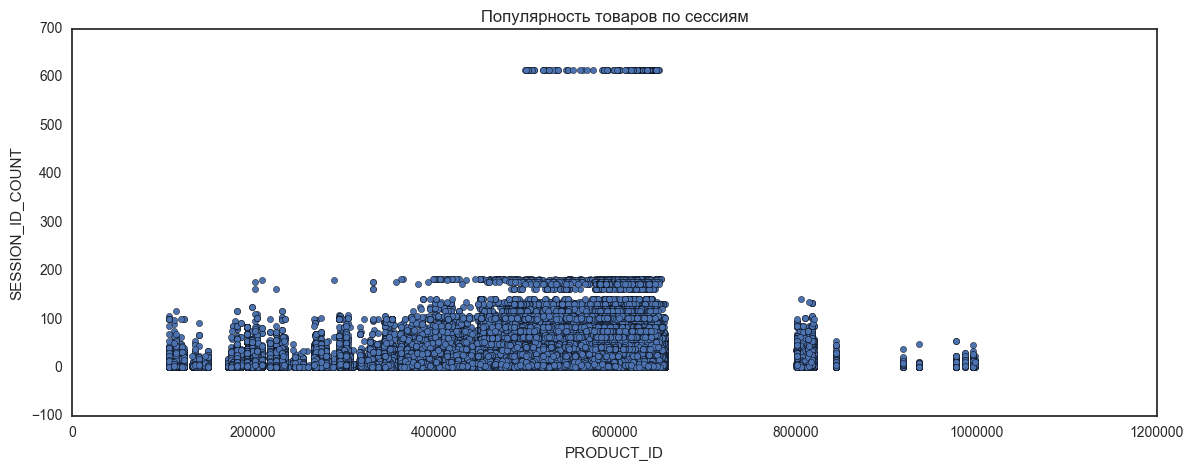

In [70]:
figsize(14, 5) 
views[['PRODUCT_ID', 'SESSION_ID_COUNT']].plot(kind='scatter', x='PRODUCT_ID', y='SESSION_ID_COUNT', title=u'Популярность товаров по сессиям')

#### Сразу бросается в глаза группа PRODUCT_ID c просмотреми более 600. Вот их номера:

In [75]:
print (views[views.SESSION_ID_COUNT>600].PRODUCT_ID.min())
print (views[views.SESSION_ID_COUNT>600].PRODUCT_ID.max())

500823.0
649137.0


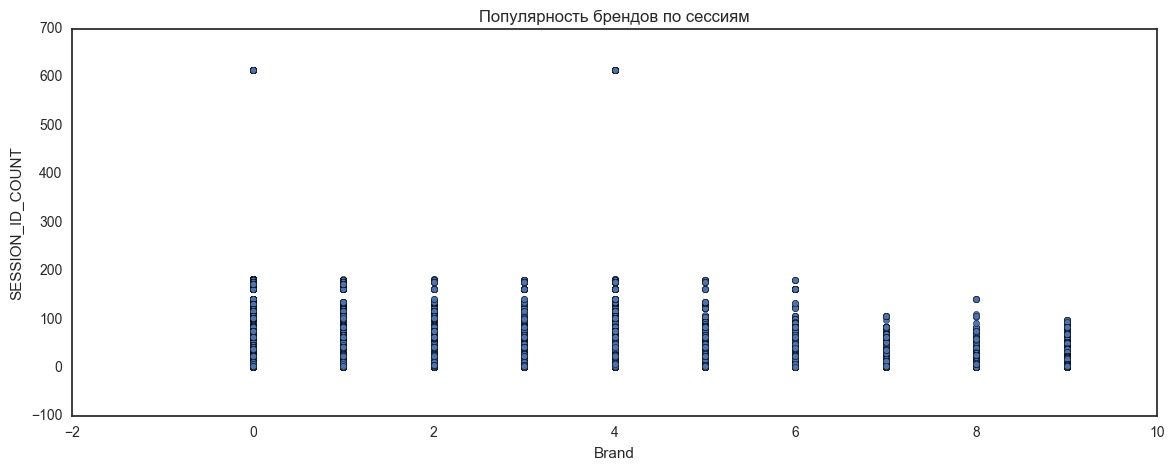

In [76]:
figsize(14, 5) 
views[['Brand', 'SESSION_ID_COUNT']].plot(kind='scatter', x='Brand', y='SESSION_ID_COUNT', title=u'Популярность брендов по сессиям')

# Формируем таблицу параметров уникальных сессий

In [78]:
sessions = views.drop(['COOKIE_ID', 'Brand', 'TIMESTAMP', 'PRODUCT_ID',  'day', 'dayofweek','hour','minute','second'],1).\
                    groupby('SESSION_ID').first()

In [79]:
print (np.shape(sessions))
sessions.describe()

(338119, 8)


,SESSION_ID_COUNT,TdiffTotal,TdiffMax,TdiffMin,PUnique,BUnique,Brand_by_time_diff,SESSION_ID_COUNT_by_time_diff
count,338119.000000,338119.000000,208040.000000,208040.000000,338119.000000,338119.000000,3.381190e+05,3.381190e+05
mean,4.002573,1036.535545,1101.334633,292.861166,3.272203,1.644445,inf,inf
std,5.732478,1496.095724,1008.278427,682.143963,4.365158,0.981409,NaN,NaN
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,6.863418e-05,2.072324e-04
25%,1.000000,0.000000,174.000000,15.000000,1.000000,1.000000,1.176471e-03,3.322259e-03
50%,2.000000,143.000000,850.000000,36.000000,2.000000,1.000000,1.015228e-02,2.050114e-02
75%,4.000000,1912.000000,1809.000000,134.000000,4.000000,2.000000,inf,inf
max,614.000000,25507.000000,17888.000000,9651.000000,601.000000,8.000000,inf,inf


## Scatter plot по полученной таблице

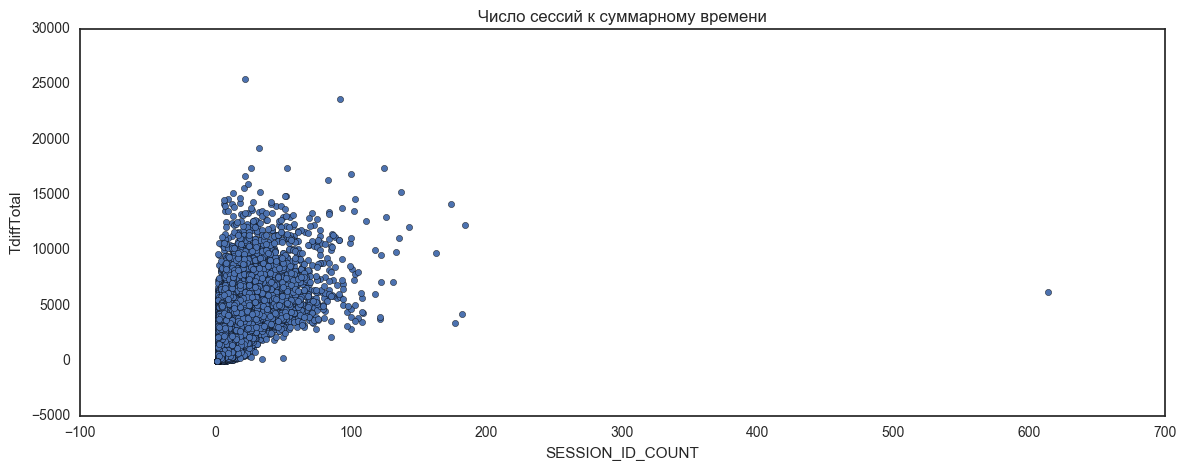

In [80]:
figsize(14, 5) 
sessions[['SESSION_ID_COUNT', 'TdiffTotal']].plot(kind='scatter', x='SESSION_ID_COUNT', y='TdiffTotal', title=u'Число сессий к суммарному времени')

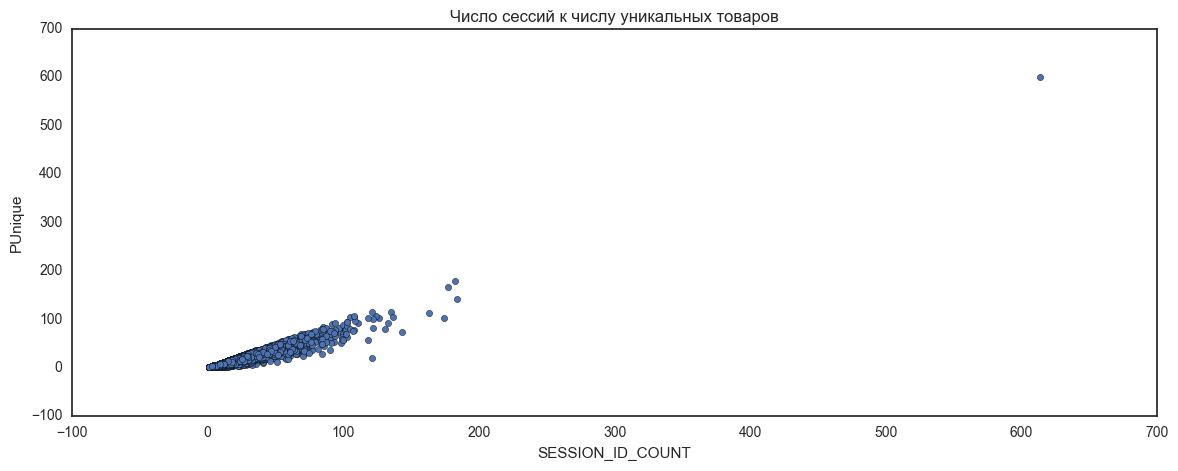

In [81]:
figsize(14, 5)
sessions[['SESSION_ID_COUNT', 'PUnique']].plot(kind='scatter', x='SESSION_ID_COUNT', y='PUnique', title=u'Число сессий к числу уникальных товаров')

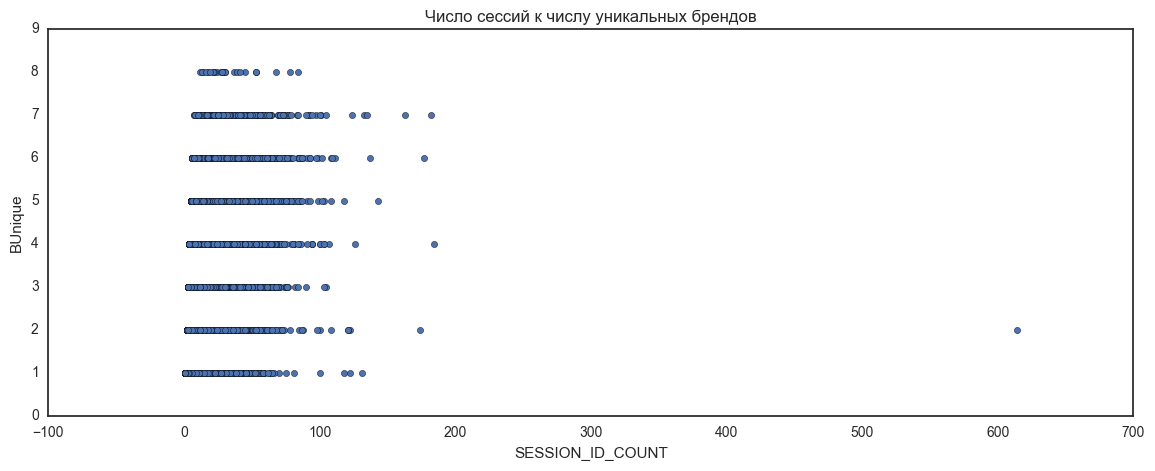

In [82]:
figsize(14, 5)
sessions[['SESSION_ID_COUNT', 'BUnique']].plot(kind='scatter', x='SESSION_ID_COUNT', y='BUnique', title=u'Число сессий к числу уникальных брендов')

# Снижение размерности и поиск аномалий

In [83]:
sessions  = sessions.replace(np.inf, np.nan).fillna(0)

In [84]:
sessions.describe()

,SESSION_ID_COUNT,TdiffTotal,TdiffMax,TdiffMin,PUnique,BUnique,Brand_by_time_diff,SESSION_ID_COUNT_by_time_diff
count,338119.000000,338119.000000,338119.000000,338119.000000,338119.000000,338119.000000,338119.000000,338119.000000
mean,4.002573,1036.535545,677.636149,180.193473,3.272203,1.644445,0.005752,0.010916
std,5.732478,1496.095724,955.316078,553.720858,4.365158,0.981409,0.030368,0.047976
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,2.000000,143.000000,107.000000,11.000000,2.000000,1.000000,0.000667,0.001662
75%,4.000000,1912.000000,1193.000000,53.000000,4.000000,2.000000,0.002472,0.006173
max,614.000000,25507.000000,17888.000000,9651.000000,601.000000,8.000000,3.000000,3.000000


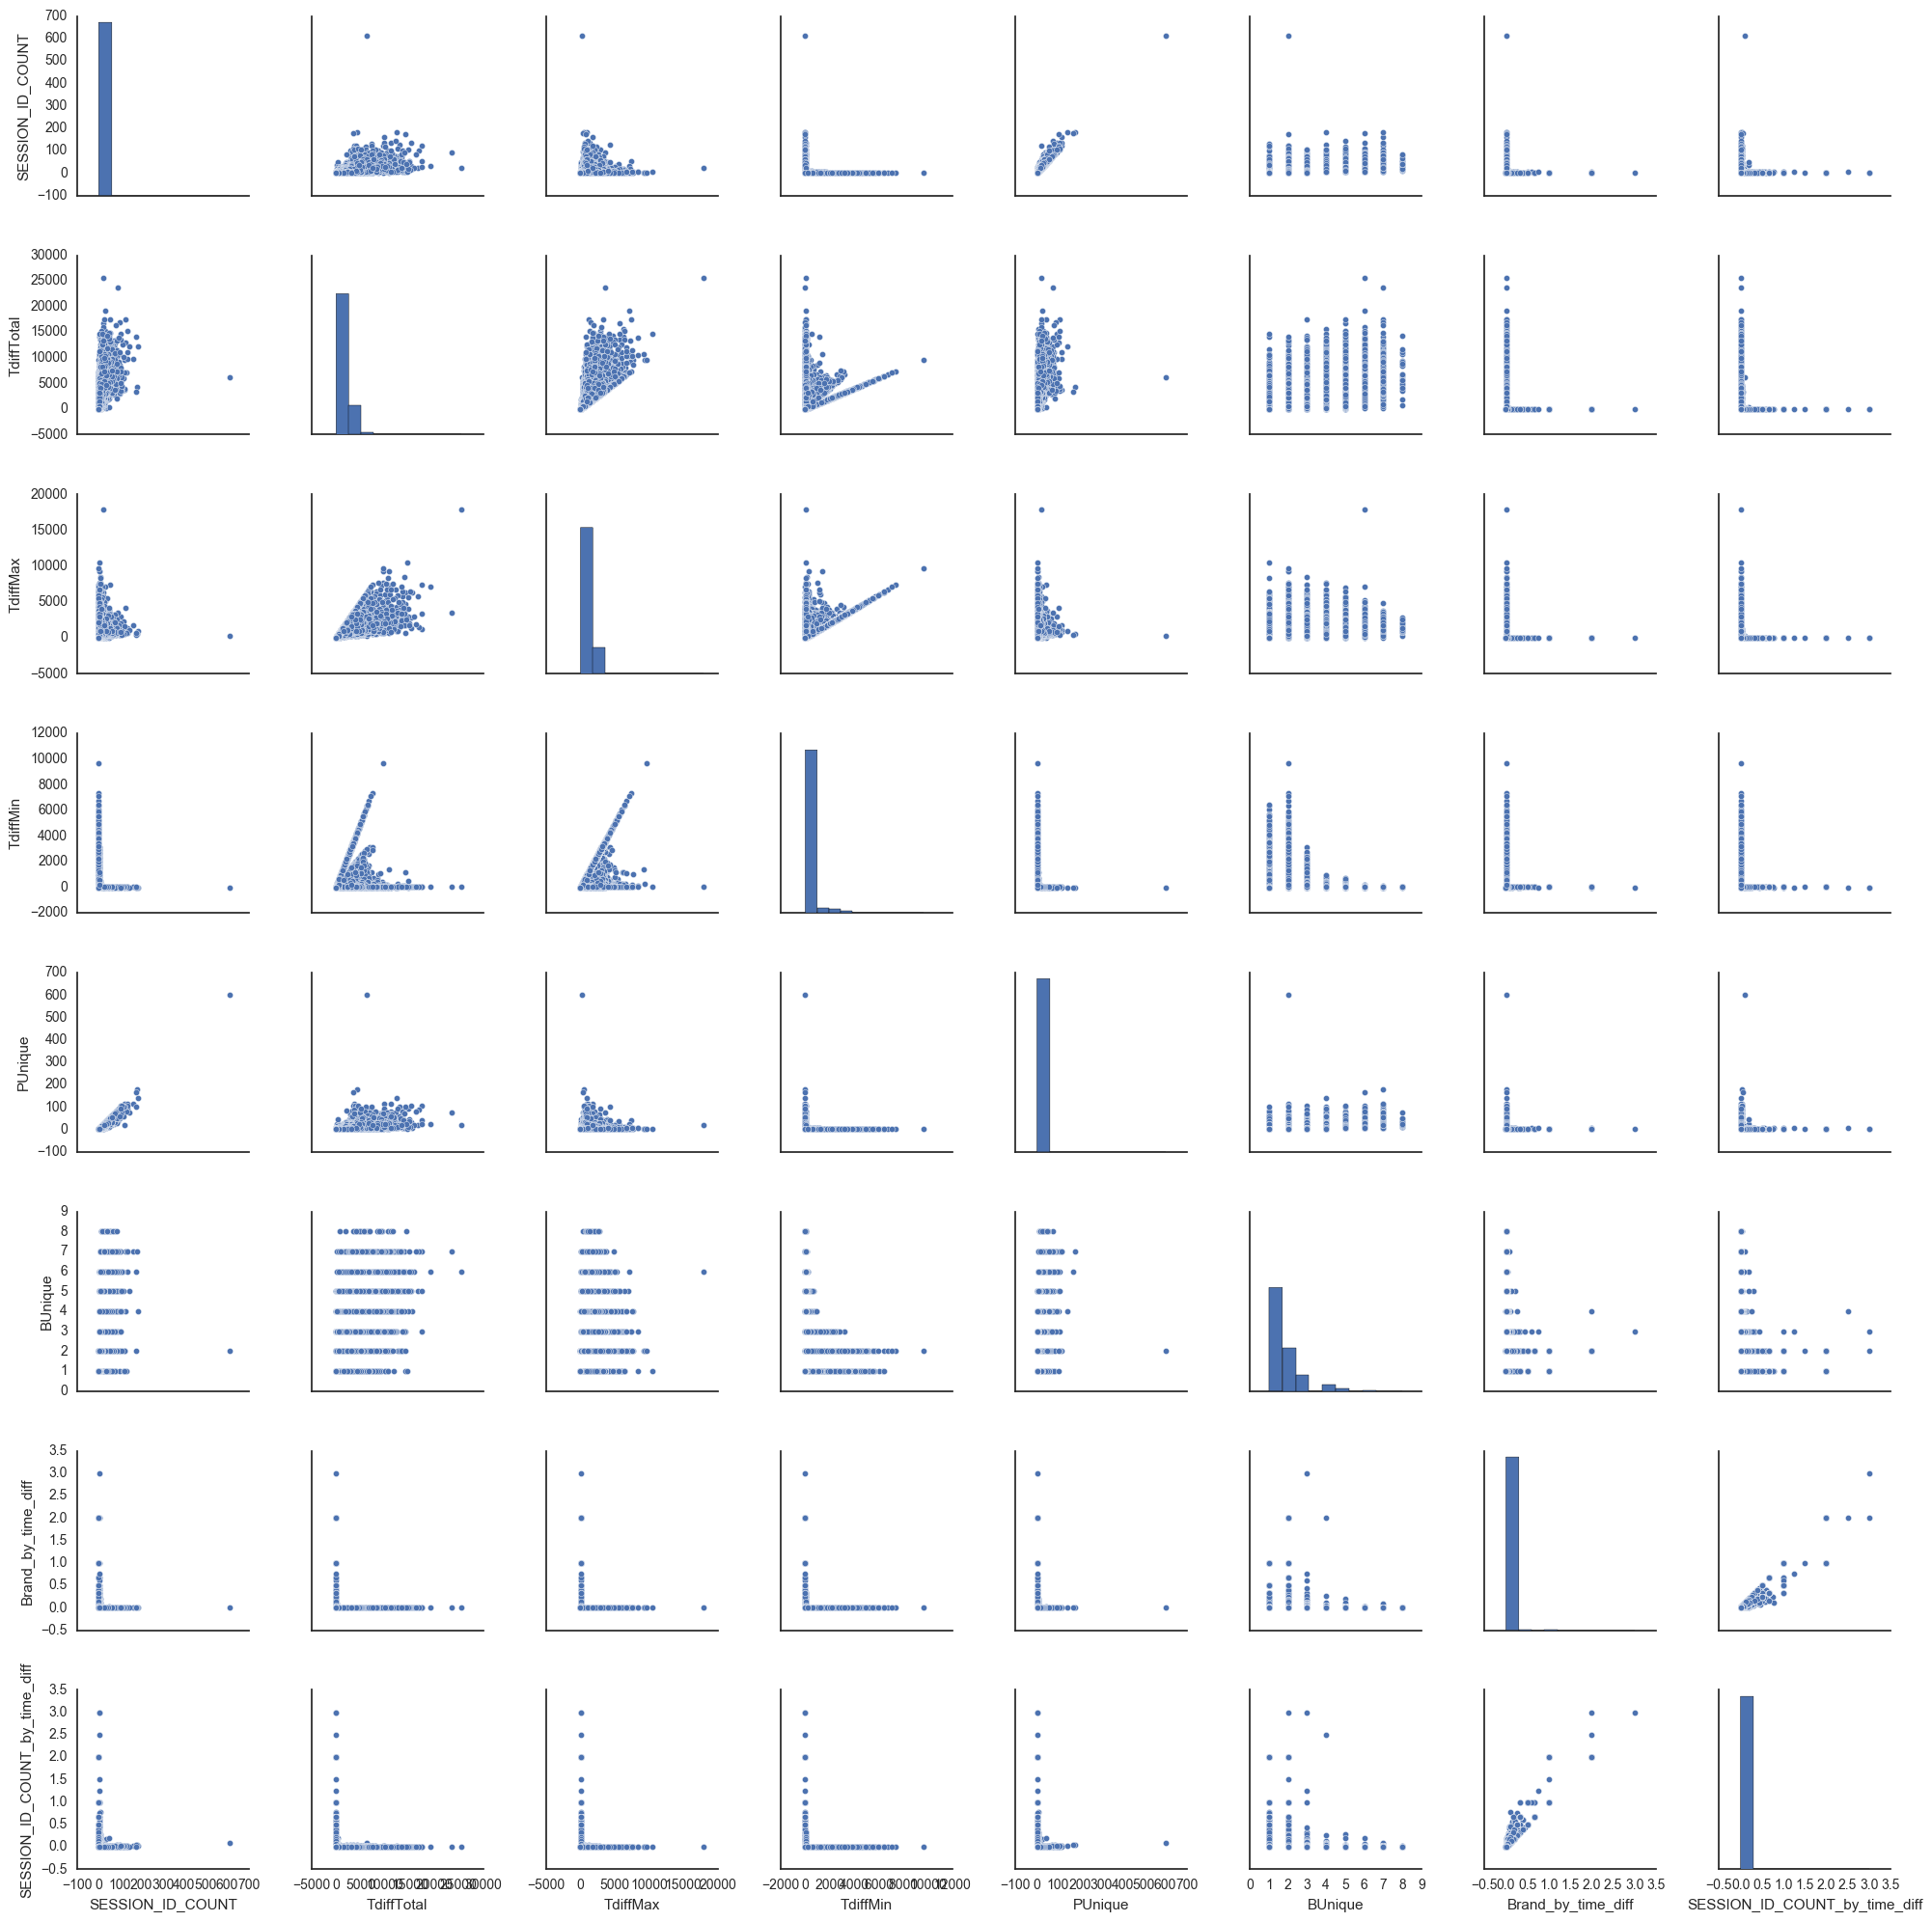

In [85]:
sns.pairplot(sessions[sessions.columns])

In [86]:
from sklearn.preprocessing import scale
from sklearn import svm
from scipy import stats
from sklearn.decomposition import PCA

In [87]:
#шкалируем данные
X = scale(sessions) 

In [88]:
#снижаем размерность
pca = PCA(n_components=2)
X = pca.fit_transform(X)

In [89]:
df=pd.DataFrame(columns=('Ncomp', 'coeff', 'feat'))
n=1
for component in pca.components_:
    for value, name in zip(component, sessions.columns):
        df.loc[len(df)]=[n,abs(value), name]
    n+=1    

In [90]:
df[df.coeff>0.4].sort_values(by=['Ncomp', 'coeff'], ascending=False)

,Ncomp,coeff,feat
15,2.0,0.683110,SESSION_ID_COUNT_by_time_diff
14,2.0,0.679745,Brand_by_time_diff
1,1.0,0.491327,TdiffTotal
4,1.0,0.457264,PUnique
0,1.0,0.452235,SESSION_ID_COUNT
5,1.0,0.412426,BUnique


Таким образом в одной компоненте оказались наиболее важными признаками - SESSION_ID_COUNT_by_time_diff и Brand_by_time_diff
а во второй:
TdiffTotal
PUnique
SESSION_ID_COUNT
BUnique


## Попытаемся найти выбросы методом OneClassSVM

In [91]:
OUT_COUNT = 0.005 # предполагаемый процент выбросов

svm_clf = svm.OneClassSVM()
svm_clf.fit(X)

dist_to_border = svm_clf.decision_function(X).ravel()
threshold = stats.scoreatpercentile(dist_to_border,
            100 * OUT_COUNT)
is_outlier = dist_to_border < threshold

(-10, 35)

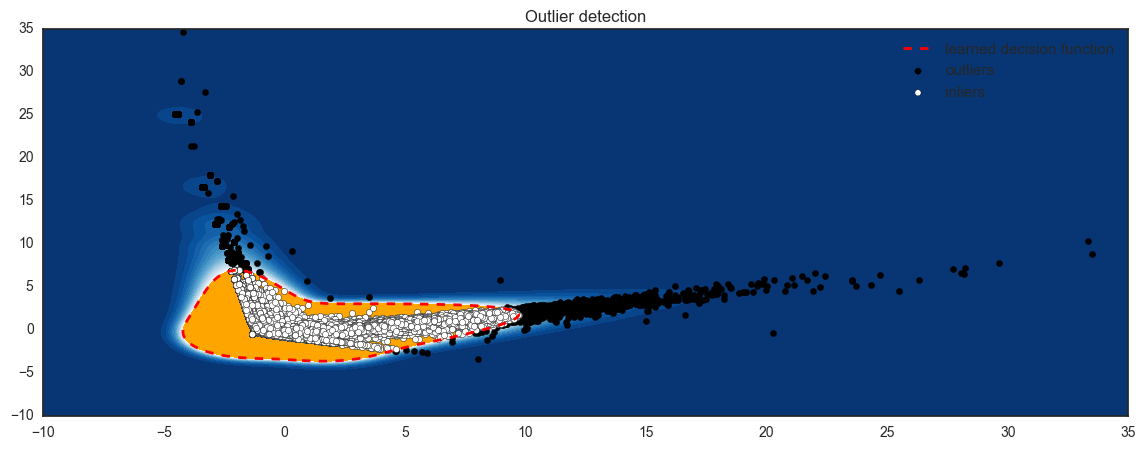

In [92]:
sess_count = sessions.shape[0]
xl=-10; yl=35
xx, yy = np.meshgrid(np.linspace(xl, yl, 500), np.linspace(xl, yl, 500))
n_inliers = int((1. - OUT_COUNT) * sess_count)
n_outliers = int(OUT_COUNT * sess_count)
Z = svm_clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.title("Outlier detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 20),
                         cmap=plt.cm.Blues_r)
a = plt.contour(xx, yy, Z, levels=[threshold],
                            linewidths=2, colors='red')
plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],
                         colors='orange')
b = plt.scatter(X[is_outlier, 0], X[is_outlier, 1], c='black')
c = plt.scatter(X[is_outlier == 0, 0], X[is_outlier == 0, 1], c='white')
plt.axis('tight')
plt.legend([a.collections[0], b, c],
           ['learned decision function', 'outliers', 'inliers'],
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.xlim((xl, yl))
plt.ylim((xl, yl))

# Сами найденные "выбросы"

In [93]:
print (np.shape(sessions[is_outlier])[0])
sessions[is_outlier].sample(10)

1677


,SESSION_ID_COUNT,TdiffTotal,TdiffMax,TdiffMin,PUnique,BUnique,Brand_by_time_diff,SESSION_ID_COUNT_by_time_diff
SESSION_ID,,,,,,,,
8517737005470709760,50,8450.0,1315.0,3.0,30.0,6,0.000710,0.005917
570805178723567808,2,1.0,1.0,1.0,2.0,2,2.000000,2.000000
3337234934624821248,84,8202.0,823.0,1.0,72.0,6,0.000732,0.010241
465785750796981952,53,9424.0,1587.0,1.0,36.0,8,0.000849,0.005624
4373703580579458560,52,5729.0,872.0,5.0,39.0,6,0.001047,0.009077
372969954948684224,3,12.0,9.0,3.0,3.0,2,0.166667,0.250000
6923495004385093632,52,8405.0,1651.0,0.0,34.0,4,0.000476,0.006187
4060075795191649792,68,6058.0,1575.0,1.0,45.0,2,0.000330,0.011225
3666817426330920960,2,2.0,2.0,2.0,2.0,2,1.000000,1.000000
